In [1]:
import sys
sys.path.append('../../')

## Create geometries from parametric shapes

Didgelab creates didgeridoo geometries from parametric shapes. The shape is a program that generates the geometry from a list of parameters. A simple shape could be:

* The didgeridoo has length p1 (p1 is a parameter)
* The first p2% of the didgeridoo are straight
* Then it opens up to bell size p3.

So this simple parametric shape has 3 parameters. The shapes implemented in DidgeLab usually have more parameters.

The shapes are named after cities in Tanzania. I came up with dozens of shapes and they needed to come up with a naming scheme. Since I spent a part of my life in Tanzania I came up with that naming scheme.

Lets start with the Mbeya Shape. This is a shape that has a straight part in the beginning and then gets wider. Also it can contain a single "bubble" in the shape, which is a part where the didgeridoo gets wider and then narrower. The source codes show both the parameters of this shape and the resulting didgeridoo geometry.

In the table you can see columns

* name: The name of this parameter
* value: The value of the parameter
* min: The minimum value of the parameter (this is important for the mutation)
* max: The maximum value of the parameter (this is important for the mutation)
* mutable: Does this parameter change through mutation? This is deprecated, usually in newer shapes, all parameters are mutable.

                  name    value     min      max  mutable
0             l_gerade  1000.00  500.00  1500.00     True
1             d_gerade     1.05    0.90     1.20     True
2   n_opening_segments     4.00    0.00     8.00     True
3     opening_factor_x     0.00   -2.00     2.00     True
4     opening_factor_y     0.00   -2.00     2.00     True
5       opening_length   850.00  700.00  1000.00     True
6           d_pre_bell    45.00   40.00    50.00     True
7               l_bell    35.00   20.00    50.00     True
8             bellsize    17.50    5.00    30.00     True
9         add_bubble_0     0.50    0.00     1.00     True
10     bubble_height_0     0.50    0.00     1.00     True
11        bubble_pos_0     0.50    0.00     1.00     True
12      bubble_width_0   150.00    0.00   300.00     True

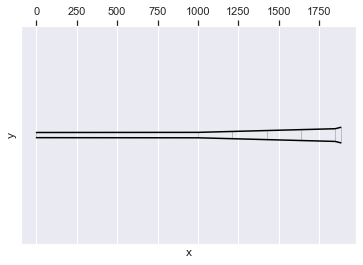

In [2]:
from cad.calc.parameters import MbeyaShape
from cad.ui.visualization import DidgeVisualizer
parameters = MbeyaShape()
geo = parameters.make_geo()
DidgeVisualizer.vis_didge(geo)

parameters

## Mutate the parameters

                  name    value     min      max  mutable
0             l_gerade  1000.00  500.00  1500.00     True
1             d_gerade     1.05    0.90     1.20     True
2   n_opening_segments     4.00    0.00     8.00     True
3     opening_factor_x     0.00   -2.00     2.00     True
4     opening_factor_y     0.00   -2.00     2.00     True
5       opening_length   850.00  700.00  1000.00     True
6           d_pre_bell    45.00   40.00    50.00     True
7               l_bell    35.00   20.00    50.00     True
8             bellsize    17.50    5.00    30.00     True
9         add_bubble_0     0.50    0.00     1.00     True
10     bubble_height_0     0.50    0.00     1.00     True
11        bubble_pos_0     0.50    0.00     1.00     True
12      bubble_width_0   150.00    0.00   300.00     True

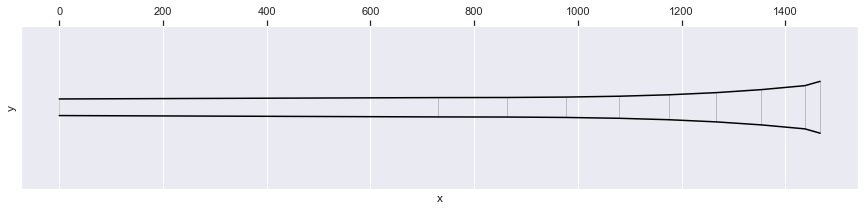

In [3]:
from cad.calc.mutation import ExploringMutator
mutator = ExploringMutator()
mutant = parameters.copy()
mutator.mutate(mutant)

geo = mutant.make_geo()
DidgeVisualizer.vis_didge(geo)
parameters

Next we randomly mutate this shape 8 times. As you can see, the resulting didgeridoos and also their impedance spektra are very different each time.

The original didge lab shapes all use a fixed mouth piece diameter of 32mm which will not be mutated. However, in the plots you can see different mouth piece widths. The didgeridoo visualization method distorts the actual shape a little bit. If you plot a bore with 32mm diameter and 2000mm length in normal scale it would look like a single line otherwise.

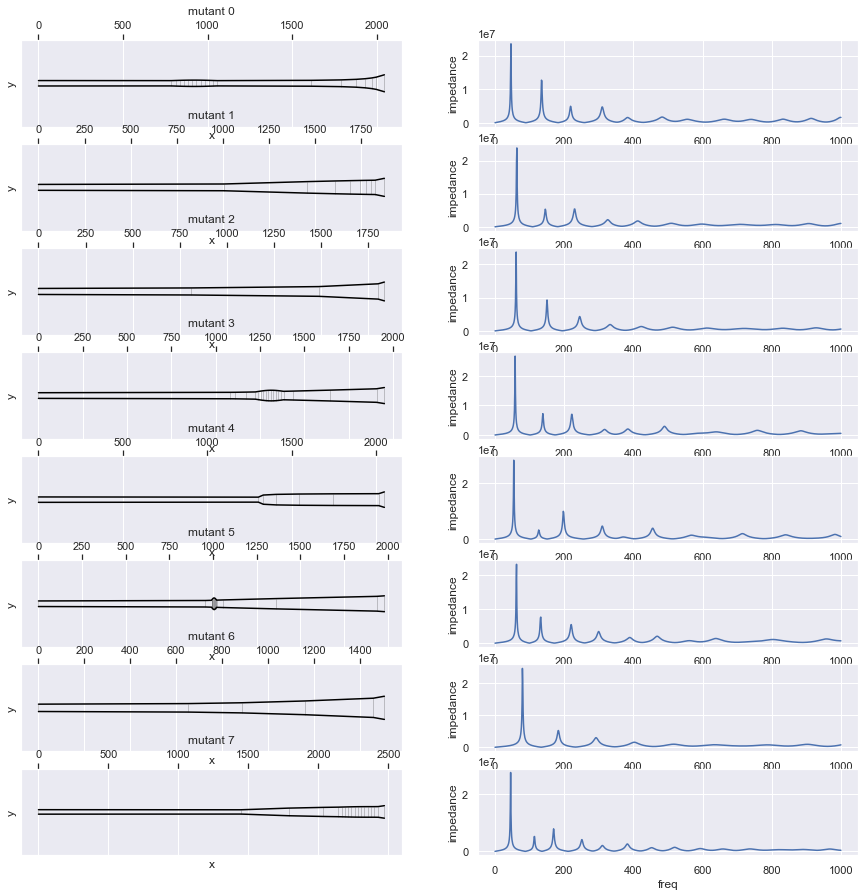

In [4]:
import matplotlib.pyplot as plt
from cad.cadsd.cadsd import CADSD
import seaborn as sns

plt.figure(figsize=(15,15))
n_mutants = 8
for i in range(n_mutants):
    plt.subplot(n_mutants, 2, 2*i+1)
    mutant = parameters.copy()
    mutator.mutate(mutant)
    geo = mutant.make_geo()
    DidgeVisualizer.vis_didge(geo)
    plt.title("mutant " + str(i))
    
    plt.subplot(n_mutants, 2, 2*i+2)
    cadsd = CADSD(geo)
    impedance_spectrum=cadsd.get_impedance_spektrum()
    sns.lineplot(data=impedance_spectrum, x="freq", y="impedance")

A later tutorial will cover how to create your own shapes.

Also there are two types of mutators: The ExploringMutator creates randomly changes all parameters at once. The FinetuningMutator tunes single parameters only. Also it has a learning rate to change this single parameter drastically or only slightly.